# Is the FIFA World Cup Draw Truly Random?

### Pratik Kulkarni - 19400570
### Shrey Parekh - 18706941
\
***Project for 301111 Discovery Project***\
\
**Supervisor: Dr. Russell Thomson**\
\
***School of Computer, Data and Mathematical Sciences,***\
***Western Sydney University***

**Spring, 2021**
***

In [1]:
#Here we import the libraries we will be using for this project.

import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

***

## 1 Fifa Rankings

In [2]:
#Here we load the data set and store in the variable fifaRanks
#We use the pandas library to read the data set
fifaRanks = pd.read_csv("fifa_ranking-2020-12-10.csv")

In [3]:
display(fifaRanks)

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,43885,104,Swaziland,SWZ,10,0,0,CAF,1992-12-31
1,43972,42,Turkey,TUR,31,0,0,UEFA,1992-12-31
2,43952,43,Northern Ireland,NIR,31,0,0,UEFA,1992-12-31
3,43945,44,Finland,FIN,31,0,0,UEFA,1992-12-31
4,43976,45,Australia,AUS,29,0,0,AFC,1992-12-31
...,...,...,...,...,...,...,...,...,...
62419,43840,74,United Arab Emirates,UAE,1326,1326,0,AFC,2020-12-10
62420,43812,75,China PR,CHN,1323,1323,0,AFC,2020-12-10
62421,1930407,76,Curaçao,CUW,1313,1313,0,CONCACAF,2020-12-10
62422,43901,51,Costa Rica,CRC,1427,1427,0,CONCACAF,2020-12-10


In [4]:
# convert date column into date format
fifaRanks['rank_date'] = pd.to_datetime(fifaRanks['rank_date'])

# Change old team name of Côte d'Ivoire to Ivory Coast
fifaRanks[['country_full']] = fifaRanks[['country_full']].replace("Côte d'Ivoire", "Ivory Coast")

# Change team name of IR Iran to Iran
fifaRanks[['country_full']] = fifaRanks[['country_full']].replace("IR Iran", "Iran")

# Change team name of Korea Republic to South Korea
fifaRanks[['country_full']] = fifaRanks[['country_full']].replace("Korea Republic", "South Korea")

# filter rows on the basis of date
fifaRanks_filtered = (fifaRanks['rank_date'] > '1994-01-01') & (fifaRanks['rank_date'] <= '2019-1-1')
  
# locate rows and access them using .loc() function
fifaRanks_filtered = fifaRanks.loc[fifaRanks_filtered]
  
# print dataframe
display(fifaRanks_filtered)

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
995,43943,109,Estonia,EST,11,11,0,UEFA,1994-02-15
996,43916,165,St. Kitts and Nevis,SKN,0,0,1,CONCACAF,1994-02-15
997,44002,58,Slovakia,SVK,30,2,92,UEFA,1994-02-15
998,43817,57,Iran,IRN,30,31,2,AFC,1994-02-15
999,43826,165,Macau,MAC,0,0,1,AFC,1994-02-15
...,...,...,...,...,...,...,...,...,...
59055,43877,137,Rwanda,RWA,1094,1094,0,CAF,2018-12-20
59056,43916,136,St. Kitts and Nevis,SKN,1105,1105,0,CONCACAF,2018-12-20
59057,43842,135,Yemen,YEM,1106,1106,0,AFC,2018-12-20
59058,43957,133,Lithuania,LTU,1111,1111,0,UEFA,2018-12-20


In [5]:
### Visualising fifa Ranks features dataset 

In [6]:
corr_fifa_ranks = fifaRanks_filtered.corr()
fifaTeamRanks = corr_fifa_ranks.style.background_gradient(cmap='coolwarm')
fifaTeamRanks



,id,rank,total_points,previous_points,rank_change
id,1.000000,0.132455,-0.064159,-0.064552,-0.000954
rank,0.132455,1.000000,-0.682426,-0.676403,-0.022537
total_points,-0.064159,-0.682426,1.000000,0.993838,-0.069405
previous_points,-0.064552,-0.676403,0.993838,1.000000,-0.080985
rank_change,-0.000954,-0.022537,-0.069405,-0.080985,1.000000


In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
plt.rcParams["figure.figsize"] = (16, 12)

<AxesSubplot:title={'center':'FIFA Team Ranks '}>

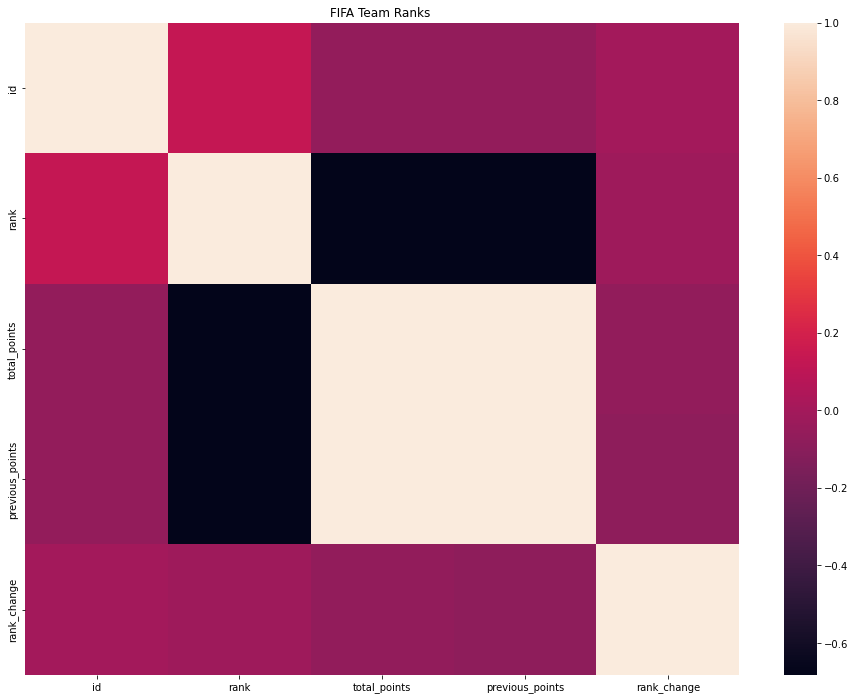

In [9]:
fifaRanks = sns.heatmap(corr_fifa_ranks)
fifaRanks.set_title('FIFA Team Ranks ')

fifaRanks

In [10]:
fifa_heatmap_Ranks = fifaRanks.get_figure()


fifa_heatmap_Ranks.savefig('fifaRanks.png', dpi=780)


In [11]:
# Get year from rank_date and extract into new dataframe
fifaRanks_years = pd.DataFrame(fifaRanks_filtered['rank_date'].dt.year)

# Rename column name from rank_date to rank_year
fifaRanks_years.columns = ['rank_year']

display(fifaRanks_years)

# Get month from rank_date and extract into new dataframe
fifaRanks_months = pd.DataFrame(fifaRanks_filtered['rank_date'].dt.month)

# Rename column name from rank_date to rank_month
fifaRanks_months.columns = ['rank_month']

display(fifaRanks_months)

,rank_year
995,1994
996,1994
997,1994
998,1994
999,1994
...,...
59055,2018
59056,2018
59057,2018
59058,2018


,rank_month
995,2
996,2
997,2
998,2
999,2
...,...
59055,12
59056,12
59057,12
59058,12


In [12]:
#fifaRanks_filtered = fifaRanks_filtered.join(fifaRanks_months)

In [13]:
fifaRanks_filtered = fifaRanks_filtered.join(fifaRanks_years)
    
display(fifaRanks_filtered)

,id,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,rank_year
995,43943,109,Estonia,EST,11,11,0,UEFA,1994-02-15,1994
996,43916,165,St. Kitts and Nevis,SKN,0,0,1,CONCACAF,1994-02-15,1994
997,44002,58,Slovakia,SVK,30,2,92,UEFA,1994-02-15,1994
998,43817,57,Iran,IRN,30,31,2,AFC,1994-02-15,1994
999,43826,165,Macau,MAC,0,0,1,AFC,1994-02-15,1994
...,...,...,...,...,...,...,...,...,...,...
59055,43877,137,Rwanda,RWA,1094,1094,0,CAF,2018-12-20,2018
59056,43916,136,St. Kitts and Nevis,SKN,1105,1105,0,CONCACAF,2018-12-20,2018
59057,43842,135,Yemen,YEM,1106,1106,0,AFC,2018-12-20,2018
59058,43957,133,Lithuania,LTU,1111,1111,0,UEFA,2018-12-20,2018


In [14]:
fifaRanks_filtered.to_csv('fifaRanks_filtered.csv', encoding='utf-8', index=False)

## 2 FIFA Groups and Matches

In [15]:
# View Matches dataset
fifa_all = pd.read_csv("WorldCupMatches.csv")

fifa_all.shape

display(fifa_all)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning Matches Dataset

In [16]:
## Clean unnessary columns
fifa_clean = fifa_all.drop(["Datetime","Stadium", "City", "Attendance", "Referee", "Assistant 1", "Assistant 2", "MatchID"], axis=1)

## Remove trailing NAs
fifa_clean = fifa_clean.dropna(how='all')

# Change old team name of Cote d'Ivoire to Ivory Coast
fifa_clean[['Home Team Name', 'Away Team Name']] = fifa_clean[['Home Team Name', 'Away Team Name']].replace("C�te d'Ivoire", "Ivory Coast")

# Change team name of IR Iran to Iran
fifa_clean[['Home Team Name', 'Away Team Name']] = fifa_clean[['Home Team Name', 'Away Team Name']].replace("IR Iran", "Iran")

# Change team name of Korea Republic to South Korea
fifa_clean[['Home Team Name', 'Away Team Name']] = fifa_clean[['Home Team Name', 'Away Team Name']].replace("Korea Republic", "South Korea")



# Remove extra code chunk of " rn"> "
fifa_clean[['Home Team Name', 'Away Team Name']] = fifa_clean[['Home Team Name', 'Away Team Name']].replace({'rn">':''}, regex=True)

###########

# Rename rows with 'Third place' to all be consistent
#fifa_clean['Stage'] = fifa_clean['Stage'].replace({' place$':'Third-Place'}, regex = True)
#fifa_clean.loc[fifa_clean['Stage'].str.endswith('place')] = 'Third-Place'

###########

# Filter rows based on years from 1994 to 2014
newdf = (fifa_clean['Year'] >= 1994) & (fifa_clean['Year'] <= 2014)
  
# locate rows and access them using .loc() function
fifa_clean = fifa_clean.loc[newdf]

display(fifa_clean)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials
464,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR
465,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL
466,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI
467,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL
468,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU
...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014.0,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),0.0,0.0,255953.0,NED,CRC
848,2014.0,Semi-finals,Brazil,1.0,7.0,Germany,,0.0,5.0,255955.0,BRA,GER
849,2014.0,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),0.0,0.0,255955.0,NED,ARG
850,2014.0,Play-off for third place,Brazil,0.0,3.0,Netherlands,,0.0,2.0,255957.0,BRA,NED


***

## Data for 2018 FIFA Matches

In [17]:
# View 2018 Matches dataset
fifa_2018 = pd.read_csv("World_cup_2018_matches.csv")

fifa_2018.shape

display(fifa_2018)

,Date,Stage,Home,Away,Home_goals,Away_goals,Home_shots,Home_shots_on_target,Home_possession,Home_fouls,...,Away_offsides,Away_corners,Extra_time,Home_extra_goals,Away_extra_goals,Penalties,Home_PK_taken,Home_PK_made,Away_PK_taken,Away_PK_made
0,2018-06-14,Group-1,Russia,Saudi Arabia,5,0,14,7,38,22,...,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-15,Group-1,Egypt,Uruguay,0,1,8,3,41,12,...,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-15,Group-1,Morocco,Iran,0,1,13,3,68,22,...,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-15,Group-1,Portugal,Spain,3,3,9,3,33,12,...,3,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-16,Group-1,France,Australia,2,1,12,5,55,16,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2018-07-07,QFinals,Russia,Croatia,2,2,13,5,35,25,...,0,8,Y,1.0,1.0,Y,5.0,3.0,5.0,4.0
60,2018-07-10,SFinals,France,Belgium,1,0,19,5,36,6,...,1,5,N,NaN,NaN,N,NaN,NaN,NaN,NaN
61,2018-07-11,SFinals,Croatia,England,2,1,22,7,56,23,...,3,4,Y,1.0,0.0,N,NaN,NaN,NaN,NaN
62,2018-07-14,Third-Place,Belgium,England,2,0,12,4,42,11,...,0,5,N,NaN,NaN,N,NaN,NaN,NaN,NaN


In [18]:
# Dropping all extra columns
fifa_2018_clean = fifa_2018.drop(list(fifa_2018)[6:30], axis = 1, inplace = False)

In [19]:
display(fifa_2018_clean)

,Date,Stage,Home,Away,Home_goals,Away_goals
0,2018-06-14,Group-1,Russia,Saudi Arabia,5,0
1,2018-06-15,Group-1,Egypt,Uruguay,0,1
2,2018-06-15,Group-1,Morocco,Iran,0,1
3,2018-06-15,Group-1,Portugal,Spain,3,3
4,2018-06-16,Group-1,France,Australia,2,1
...,...,...,...,...,...,...
59,2018-07-07,QFinals,Russia,Croatia,2,2
60,2018-07-10,SFinals,France,Belgium,1,0
61,2018-07-11,SFinals,Croatia,England,2,1
62,2018-07-14,Third-Place,Belgium,England,2,0


In [20]:
# Check for NAs
fifa_2018_clean.isna().sum()

Date          0
Stage         0
Home          0
Away          0
Home_goals    0
Away_goals    0
dtype: int64

### Adding a col for Year and Dropping Date

In [21]:
# Add a column with value '2018.0' for all rows
fifa_2018_clean['Year'] = 2018.0

# Drop date column
fifa_2018_clean = fifa_2018_clean.drop(["Date"], axis = 1)

In [22]:
display(fifa_2018_clean)

,Stage,Home,Away,Home_goals,Away_goals,Year
0,Group-1,Russia,Saudi Arabia,5,0,2018.0
1,Group-1,Egypt,Uruguay,0,1,2018.0
2,Group-1,Morocco,Iran,0,1,2018.0
3,Group-1,Portugal,Spain,3,3,2018.0
4,Group-1,France,Australia,2,1,2018.0
...,...,...,...,...,...,...
59,QFinals,Russia,Croatia,2,2,2018.0
60,SFinals,France,Belgium,1,0,2018.0
61,SFinals,Croatia,England,2,1,2018.0
62,Third-Place,Belgium,England,2,0,2018.0


### Changing names to match rest of data

In [23]:
fifa_2018_clean.rename(columns={'Home': 'Home Team Name',
                               'Away':'Away Team Name',
                               'Home_goals':'Home Team Goals',
                               'Away_goals':'Away Team Goals'},
                      inplace=True)

In [24]:
display(fifa_2018_clean)

,Stage,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Year
0,Group-1,Russia,Saudi Arabia,5,0,2018.0
1,Group-1,Egypt,Uruguay,0,1,2018.0
2,Group-1,Morocco,Iran,0,1,2018.0
3,Group-1,Portugal,Spain,3,3,2018.0
4,Group-1,France,Australia,2,1,2018.0
...,...,...,...,...,...,...
59,QFinals,Russia,Croatia,2,2,2018.0
60,SFinals,France,Belgium,1,0,2018.0
61,SFinals,Croatia,England,2,1,2018.0
62,Third-Place,Belgium,England,2,0,2018.0


### Changing order of cols to match the larger dataset

In [25]:
# Get all column names from df and place in a list
cols = fifa_2018_clean.columns.tolist()
print(cols)

# Move last element to first position
cols = cols[-1:] + cols[:-1]
print(cols)

# Reorder in fifa_2018_clean df
fifa_2018_clean = fifa_2018_clean[cols]

['Stage', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals', 'Year']
['Year', 'Stage', 'Home Team Name', 'Away Team Name', 'Home Team Goals', 'Away Team Goals']


In [26]:
display(fifa_2018_clean)
fifa_2018_clean.to_csv('fifa2018_clean.csv', encoding='utf-8', index=False)

,Year,Stage,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals
0,2018.0,Group-1,Russia,Saudi Arabia,5,0
1,2018.0,Group-1,Egypt,Uruguay,0,1
2,2018.0,Group-1,Morocco,Iran,0,1
3,2018.0,Group-1,Portugal,Spain,3,3
4,2018.0,Group-1,France,Australia,2,1
...,...,...,...,...,...,...
59,2018.0,QFinals,Russia,Croatia,2,2
60,2018.0,SFinals,France,Belgium,1,0
61,2018.0,SFinals,Croatia,England,2,1
62,2018.0,Third-Place,Belgium,England,2,0


***
### Appending 2018 FIFA dataset to 1994-2014 FIFA dataset

In [27]:
fifa_clean = fifa_clean.append(fifa_2018_clean)

In [28]:
display(fifa_clean)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials
464,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR
465,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL
466,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI
467,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL
468,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU
...,...,...,...,...,...,...,...,...,...,...,...,...
59,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,NaN,NaN
60,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN
61,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,NaN,NaN
62,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,NaN,NaN


## Merging Ranks and Matches Dataset

In [29]:
# Merge cleaned fifa matches dataset and fifaRanks dataset based on team names and year
fifaMatchesRanksHome = pd.merge(fifa_clean, fifaRanks_filtered,  how='left', left_on=['Home Team Name','Year'], right_on = ['country_full','rank_year'])

# Drop duplicate rank entries, keeping only the last entry for each year
fifaMatchesRanksHome.drop_duplicates(subset = ['Home Team Name', 'Away Team Name', 'RoundID', 'rank_year'], keep = 'last',  inplace= True) 


# Drop extra columns from fifaRanks dataset
fifaMatchesRanksHome = fifaMatchesRanksHome.drop(["id","country_full", "country_abrv", "confederation", "rank_date", "rank_year"], axis=1)
display(fifaMatchesRanksHome)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,rank,total_points,previous_points,rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,48,1424,1424,0
4958,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,2,1726,1726,0
4970,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,NaN,NaN,4,1634,1634,0
4982,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,NaN,NaN,1,1727,1727,0


In [30]:
fifaMatchesRanksHome = fifaMatchesRanksHome.rename(columns={col: 'home_'+col 
                        for col in fifaMatchesRanksHome.columns[range(12, 16, 1)]})
display(fifaMatchesRanksHome)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,48,1424,1424,0
4958,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,2,1726,1726,0
4970,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,NaN,NaN,4,1634,1634,0
4982,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,NaN,NaN,1,1727,1727,0


In [31]:
fifaMatchesRanksAway = pd.merge(fifaMatchesRanksHome, fifaRanks_filtered,  how='left', left_on=['Away Team Name','Year'], right_on = ['country_full','rank_year'])

# Drop duplicate rank entries, keeping only the last entry for each year
fifaMatchesRanksAway.drop_duplicates(subset = ['Home Team Name', 'Away Team Name', 'RoundID',  'rank_year'], keep = 'last',  inplace= True) 


# Drop extra columns from fifaRanks dataset
fifaMatchesRanksAway = fifaMatchesRanksAway.drop(["id","country_full", "country_abrv", "confederation", "rank_date", "rank_year"], axis=1)
display(fifaMatchesRanksAway)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,rank,total_points,previous_points,rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3,35,41,41,0
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1,44,37,37,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1,7,58,58,0
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1,9,58,58,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2,11,57,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,48,1424,1424,0,4,1634,1634,0
4761,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,2,1726,1726,0,1,1727,1727,0
4773,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,NaN,NaN,4,1634,1634,0,5,1631,1631,0
4785,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,NaN,NaN,1,1727,1727,0,5,1631,1631,0


In [32]:
fifaMatchesRanks = fifaMatchesRanksAway.rename(columns={col: 'away_'+col 
                        for col in fifaMatchesRanksAway.columns[range(16, 20, 1)]})
display(fifaMatchesRanks)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3,35,41,41,0
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1,44,37,37,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1,7,58,58,0
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1,9,58,58,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2,11,57,57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,48,1424,1424,0,4,1634,1634,0
4761,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,2,1726,1726,0,1,1727,1727,0
4773,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,NaN,NaN,4,1634,1634,0,5,1631,1631,0
4785,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,NaN,NaN,1,1727,1727,0,5,1631,1631,0


In [33]:
# df1 =  fifa_clean.drop(fifa_clean.columns[[range(3, 12, 1)]], axis=1)

# display(df1)

# df2 =  fifaMatchesRanks.drop(fifaMatchesRanks.columns[[range(3, 17, 1)]], axis=1)

# display(df2)


# df_diff = pd.concat([df1,df2]).drop_duplicates(keep=False)

# df_diff

In [34]:
fifa_clean.to_csv('fifa_clean.csv', encoding='utf-8', index=False)

fifaMatchesRanks.to_csv('fifaMatchesRanks.csv', encoding='utf-8', index=False)


In [35]:
# df = fifaMatchesRanks.rename(columns={col: 'home_'+col 
#                         for col in fifaMatchesRanks.columns[range(12, 16, 1)]})
# display(df)

***

## Creating dataframes for Years 1994-2018

In [36]:
#def extract_fifayear(year):
    
    # only keep rows where Year == 2014
 #   fifayear = pd.DataFrame(fifaMatchesRanks.loc[fifaMatchesRanks['Year'] == year])
        
    # only keep Group "X" rows to get groups in FIFA 'year' Matches.
    #fifayear_groups = pd.DataFrame(fifayear.loc[:(fifayear == 'Round of 16').any(1).idxmax()])
        
    #drop duplicates
    #fifayear_groups_unique = pd.DataFrame(fifayear_groups.drop_duplicates(subset=['Home Team Name']))

    # alphabetical sort
    #fifayear_groups_unique = pd.DataFrame(fifayear_groups_unique.sort_values('Stage'))

    #remove all extra columns
    #fifayear_groups_unique = pd.DataFrame(
        #fifayear_groups_unique.drop(fifayear_groups_unique.columns[[range(3, 12, 1)]], axis=1))
         
    #return fifayear, fifayear_groups, fifayear_groups_unique

In [37]:
def extract_fifayear(year):
    
    # only keep rows where Year == 2014
    fifayear = pd.DataFrame(fifaMatchesRanks.loc[fifaMatchesRanks['Year'] == year])
        
    return fifayear

In [38]:
fifa2018 = extract_fifayear(2018)
display(fifa2018)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
4041,2018.0,Group-1,Russia,5.0,0.0,Saudi Arabia,NaN,NaN,NaN,NaN,NaN,NaN,48,1424,1424,0,69,1335,1335,0
4053,2018.0,Group-1,Egypt,0.0,1.0,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,56,1393,1393,0,7,1609,1609,0
4065,2018.0,Group-1,Morocco,0.0,1.0,Iran,NaN,NaN,NaN,NaN,NaN,NaN,40,1440,1440,0,29,1481,1481,0
4077,2018.0,Group-1,Portugal,3.0,3.0,Spain,NaN,NaN,NaN,NaN,NaN,NaN,6,1614,1614,0,9,1591,1591,0
4089,2018.0,Group-1,France,2.0,1.0,Australia,NaN,NaN,NaN,NaN,NaN,NaN,2,1726,1726,0,41,1436,1436,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,48,1424,1424,0,4,1634,1634,0
4761,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,2,1726,1726,0,1,1727,1727,0
4773,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,NaN,NaN,4,1634,1634,0,5,1631,1631,0
4785,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,NaN,NaN,1,1727,1727,0,5,1631,1631,0


In [39]:
fifa2018.to_csv('fifa2018.csv', encoding='utf-8', index=False)

In [40]:
#fifa2014, fifa2014_groups, fifa2014_groups_unique = extract_fifayear(2014)

fifa2014 = extract_fifayear(2014)
display(fifa2014)

# display(fifa2014_groups)
# display(fifa2014_groups_unique)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
3273,2014.0,Group A,Brazil,3.0,1.0,Croatia,,1.0,1.0,255931.0,BRA,CRO,6,1316,1316,0,19,946,946,0
3285,2014.0,Group A,Mexico,1.0,0.0,Cameroon,,0.0,0.0,255931.0,MEX,CMR,20,913,913,0,42,665,664,1
3297,2014.0,Group B,Spain,1.0,5.0,Netherlands,,1.0,1.0,255931.0,ESP,NED,9,1142,1142,0,5,1374,1374,0
3309,2014.0,Group B,Chile,3.0,1.0,Australia,,2.0,1.0,255931.0,CHI,AUS,14,1022,1022,0,100,324,327,2
3321,2014.0,Group C,Colombia,3.0,0.0,Greece,,1.0,0.0,255931.0,COL,GRE,3,1450,1450,0,24,856,856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,2014.0,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),0.0,0.0,255953.0,NED,CRC,5,1374,1374,0,16,997,995,0
3993,2014.0,Semi-finals,Brazil,1.0,7.0,Germany,,0.0,5.0,255955.0,BRA,GER,6,1316,1316,0,1,1725,1725,0
4005,2014.0,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),0.0,0.0,255955.0,NED,ARG,5,1374,1374,0,2,1538,1538,0
4017,2014.0,Play-off for third place,Brazil,0.0,3.0,Netherlands,,0.0,2.0,255957.0,BRA,NED,6,1316,1316,0,5,1374,1374,0


In [41]:
fifa2014.to_csv('fifa2014.csv', encoding='utf-8', index=False)

In [42]:
fifa2010 = extract_fifayear(2010)

display(fifa2010)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
2568,2010.0,Group A,South Africa,1.0,1.0,Mexico,,0.0,0.0,249722.0,RSA,MEX,51,550,562,1,27,795,790,1
2579,2010.0,Group A,Uruguay,0.0,0.0,France,,0.0,0.0,249722.0,URU,FRA,7,1153,1174,0,18,867,852,3
2590,2010.0,Group B,South Korea,2.0,0.0,Greece,,1.0,0.0,249722.0,KOR,GRE,40,647,653,1,11,1016,1043,0
2601,2010.0,Group B,Argentina,1.0,0.0,Nigeria,,1.0,0.0,249722.0,ARG,NGA,5,1338,1353,0,32,725,711,1
2612,2010.0,Group C,England,1.0,1.0,USA,,1.0,1.0,249722.0,ENG,USA,6,1195,1250,0,18,867,847,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2010.0,Quarter-finals,Paraguay,0.0,1.0,Spain,,0.0,0.0,249718.0,PAR,ESP,24,832,850,1,1,1887,1920,0
3228,2010.0,Semi-finals,Uruguay,2.0,3.0,Netherlands,,1.0,1.0,249719.0,URU,NED,7,1153,1174,0,2,1723,1718,0
3239,2010.0,Semi-finals,Germany,0.0,1.0,Spain,,0.0,0.0,249719.0,GER,ESP,3,1485,1489,1,1,1887,1920,0
3250,2010.0,Match for third place,Uruguay,2.0,3.0,Germany,,1.0,1.0,249720.0,URU,GER,7,1153,1174,0,3,1485,1489,1


In [43]:
fifa2006 = extract_fifayear(2006)

display(fifa2006)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
1874,2006.0,Group A,Germany,4.0,2.0,Costa Rica,,2.0,1.0,97410100.0,GER,CRC,6,1350,1348,0,68,458,458,0
1885,2006.0,Group A,Poland,0.0,2.0,Ecuador,,0.0,1.0,97410100.0,POL,ECU,24,854,859,2,30,802,802,0
1896,2006.0,Group B,England,1.0,0.0,Paraguay,,1.0,0.0,97410100.0,ENG,PAR,5,1359,1359,0,35,745,745,0
1907,2006.0,Group B,Trinidad and Tobago,0.0,0.0,Sweden,,0.0,0.0,97410100.0,TRI,SWE,91,360,355,1,14,958,958,0
1918,2006.0,Group C,Argentina,2.0,1.0,Ivory Coast,,2.0,0.0,97410100.0,ARG,CIV,3,1551,1551,0,18,919,919,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2006.0,Quarter-finals,Brazil,0.0,1.0,France,,0.0,0.0,97410300.0,BRA,FRA,1,1588,1588,0,4,1523,1523,0
2524,2006.0,Semi-finals,Germany,0.0,2.0,Italy,Italy win after extra time,0.0,0.0,97410400.0,GER,ITA,6,1350,1348,0,2,1560,1560,0
2535,2006.0,Semi-finals,Portugal,0.0,1.0,France,,0.0,1.0,97410400.0,POR,FRA,8,1258,1258,0,4,1523,1523,0
2546,2006.0,Third place,Germany,3.0,1.0,Portugal,,0.0,0.0,97410500.0,GER,POR,6,1350,1348,0,8,1258,1258,0


In [44]:
fifa2002 = extract_fifayear(2002)

display(fifa2002)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
1170,2002.0,Group A,France,0.0,1.0,Senegal,,0.0,1.0,43950100.0,FRA,SEN,2,787,787,0,27,646,640,2
1181,2002.0,Group A,Uruguay,1.0,2.0,Denmark,,0.0,1.0,43950100.0,URU,DEN,28,643,653,5,12,707,705,1
1192,2002.0,Group E,Republic of Ireland,1.0,1.0,Cameroon,,0.0,1.0,43950100.0,IRL,CMR,14,697,699,0,16,685,685,1
1203,2002.0,Group E,Germany,8.0,0.0,Saudi Arabia,,4.0,0.0,43950100.0,GER,KSA,4,761,763,0,38,608,612,0
1214,2002.0,Group F,Argentina,1.0,0.0,Nigeria,,0.0,0.0,43950100.0,ARG,NGA,5,751,741,0,29,642,643,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2002.0,Quarter-finals,Spain,0.0,0.0,South Korea,Korea Republic win on penalties (3 - 5),0.0,0.0,43950300.0,ESP,KOR,3,779,779,0,20,669,671,0
1830,2002.0,Semi-finals,Germany,1.0,0.0,South Korea,,0.0,0.0,43950400.0,GER,KOR,4,761,763,0,20,669,671,0
1841,2002.0,Semi-finals,Brazil,1.0,0.0,Turkey,,0.0,0.0,43950400.0,BRA,TUR,1,856,857,0,9,729,728,1
1852,2002.0,Third place,South Korea,2.0,3.0,Turkey,,1.0,3.0,43950500.0,KOR,TUR,20,669,671,0,9,729,728,1


In [45]:
fifa1998 = extract_fifayear(1998)

display(fifa1998)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
529,1998.0,Group A,Brazil,2.0,1.0,Scotland,,1.0,1.0,1014.0,BRA,SCO,1,73,74,0,38,50,50,2
539,1998.0,Group A,Morocco,2.0,2.0,Norway,,1.0,1.0,1014.0,MAR,NOR,13,60,60,0,14,59,59,0
549,1998.0,Group B,Italy,2.0,2.0,Chile,,1.0,1.0,1014.0,ITA,CHI,7,64,64,1,16,58,58,0
559,1998.0,Group B,Cameroon,1.0,1.0,Austria,,0.0,0.0,1014.0,CMR,AUT,41,49,48,2,22,55,55,1
569,1998.0,Group D,Paraguay,0.0,0.0,Bulgaria,,0.0,0.0,1014.0,PAR,BUL,25,55,55,1,49,45,46,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1998.0,Quarter-finals,Germany,0.0,3.0,Croatia,,0.0,1.0,1025.0,GER,CRO,3,67,67,0,4,67,67,0
1129,1998.0,Semi-finals,Brazil,1.0,1.0,Netherlands,Brazil win on penalties (4 - 2),0.0,0.0,1026.0,BRA,NED,1,73,74,0,11,62,62,2
1139,1998.0,Semi-finals,France,2.0,1.0,Croatia,,0.0,0.0,1026.0,FRA,CRO,2,69,69,0,4,67,67,0
1149,1998.0,Match for third place,Netherlands,1.0,2.0,Croatia,,1.0,2.0,1028.0,NED,CRO,11,62,62,2,4,67,67,0


In [46]:
fifa1998.to_csv('fifa1998.csv', encoding='utf-8', index=False)

In [47]:
fifa1994 = extract_fifayear(1994)

display(fifa1994)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3,35,41,41,0
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1,44,37,37,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1,7,58,58,0
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1,9,58,58,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2,11,57,57,0
59,1994.0,Group F,Belgium,1.0,0.0,Morocco,,1.0,0.0,337.0,BEL,MAR,24,47,48,2,33,43,43,2
69,1994.0,Group E,Norway,1.0,0.0,Mexico,,0.0,0.0,337.0,NOR,MEX,8,58,57,2,15,54,52,4
79,1994.0,Group B,Cameroon,2.0,2.0,Sweden,,1.0,1.0,337.0,CMR,SWE,31,44,44,3,3,61,62,1
89,1994.0,Group F,Netherlands,2.0,1.0,Saudi Arabia,,0.0,1.0,337.0,NED,KSA,6,60,60,0,27,45,45,0
99,1994.0,Group B,Brazil,2.0,0.0,Russia,,1.0,0.0,337.0,BRA,RUS,1,67,67,0,13,54,54,1


***

***

## World Cup Results Dataset

In [48]:
fifaResults = pd.read_csv("final_team_rankings_mod.csv")

fifaResults.shape

display(fifaResults)

,Unnamed: 0,Year,Host,Champion,Runner-Up,Third,Fourth,Teams,Matches Played,Goals Scored,Avg Goals Per Game
0,0,2018,Russia,France,Croatia,Belgium,England,32,64,169,2.6
1,1,2014,Brazil,Germany,Argentina,Netherlands,Brazil,32,64,171,2.7
2,2,2010,South Africa,Spain,Netherlands,Germany,Uruguay,32,64,145,2.3
3,3,2006,Germany,Italy,France,Germany,Portugal,32,64,147,2.3
4,4,2002,"South Korea, Japan",Brazil,Germany,Turkey,Korea Republic,32,64,161,2.5
5,5,1998,France,France,Brazil,Croatia,Netherlands,32,64,171,2.7
6,6,1994,United States,Brazil,Italy,Sweden,Bulgaria,24,52,141,2.7
7,7,1990,Italy,West Germany,Argentina,Italy,England,24,52,115,2.2
8,8,1986,Mexico,Argentina,West Germany,France,Belgium,24,52,132,2.5
9,9,1982,Spain,Italy,West Germany,Poland,France,24,52,146,2.8


In [49]:
fifaResults = fifaResults.sort_values("Year")
display(fifaResults)

,Unnamed: 0,Year,Host,Champion,Runner-Up,Third,Fourth,Teams,Matches Played,Goals Scored,Avg Goals Per Game
20,20,1930,Uruguay,Uruguay,Argentina,United States,Yugoslavia,13,16,70,3.6
19,19,1934,Italy,Italy,Czechoslovakia,Germany,Austria,16,17,70,4.1
18,18,1938,France,Italy,Hungary,Brazil,Sweden,15,18,84,4.7
17,17,1950,Brazil,Uruguay,Brazil,Sweden,Spain,13,22,88,4.0
16,16,1954,Switzerland,West Germany,Hungary,Austria,Uruguay,16,26,140,5.4
15,15,1958,Sweden,Brazil,Sweden,France,Germany FR,16,35,126,3.6
14,14,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,16,32,89,2.8
13,13,1966,England,England,West Germany,Portugal,Soviet Union,16,32,89,2.8
12,12,1970,Mexico,Brazil,Italy,West Germany,Uruguay,16,32,95,3.0
11,11,1974,West Germany,West Germany,Netherlands,Poland,Brazil,16,38,97,2.6


In [50]:
fifaResults =  fifaResults.drop(columns=['Unnamed: 0'])

In [51]:
fifaResults_filtered = (fifaResults['Year'] >= 1994)

# locate rows and access them using .loc() function
fifaResults_filtered = fifaResults.loc[fifaResults_filtered]

display(fifaResults_filtered)

,Year,Host,Champion,Runner-Up,Third,Fourth,Teams,Matches Played,Goals Scored,Avg Goals Per Game
6,1994,United States,Brazil,Italy,Sweden,Bulgaria,24,52,141,2.7
5,1998,France,France,Brazil,Croatia,Netherlands,32,64,171,2.7
4,2002,"South Korea, Japan",Brazil,Germany,Turkey,Korea Republic,32,64,161,2.5
3,2006,Germany,Italy,France,Germany,Portugal,32,64,147,2.3
2,2010,South Africa,Spain,Netherlands,Germany,Uruguay,32,64,145,2.3
1,2014,Brazil,Germany,Argentina,Netherlands,Brazil,32,64,171,2.7
0,2018,Russia,France,Croatia,Belgium,England,32,64,169,2.6


In [52]:
#### Visualisations

***

## Fairness Index Implementation

In [53]:
fifa1994 = extract_fifayear(1994)

display(fifa1994)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3,35,41,41,0
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1,44,37,37,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1,7,58,58,0
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1,9,58,58,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2,11,57,57,0
59,1994.0,Group F,Belgium,1.0,0.0,Morocco,,1.0,0.0,337.0,BEL,MAR,24,47,48,2,33,43,43,2
69,1994.0,Group E,Norway,1.0,0.0,Mexico,,0.0,0.0,337.0,NOR,MEX,8,58,57,2,15,54,52,4
79,1994.0,Group B,Cameroon,2.0,2.0,Sweden,,1.0,1.0,337.0,CMR,SWE,31,44,44,3,3,61,62,1
89,1994.0,Group F,Netherlands,2.0,1.0,Saudi Arabia,,0.0,1.0,337.0,NED,KSA,6,60,60,0,27,45,45,0
99,1994.0,Group B,Brazil,2.0,0.0,Russia,,1.0,0.0,337.0,BRA,RUS,1,67,67,0,13,54,54,1


## Equation

lm(result~points+fairness)

In [54]:
fifa1994.head()

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,Home Team Initials,Away Team Initials,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,ESP,KOR,2,62,61,3,35,41,41,0
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,GER,BOL,5,61,61,1,44,37,37,1
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,USA,SUI,23,48,48,1,7,58,58,0
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,ITA,IRL,4,61,61,1,9,58,58,1
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,COL,ROU,17,53,53,2,11,57,57,0


In [55]:
#### Create Fairness Score for Home and Away Teams

# Create a sklearn scaler object
mms = MinMaxScaler()
ss = StandardScaler()
norm = Normalizer(norm='l2')


def createFairnessIndex(fifayear):
    
    # For all values in the dataset, create fairness score based on home_total_points/away_total_points for the Home team
    # and vice-versa for the Away team
    
    #fifayear = fifayear.reset_index()
    
    for Stage, row in fifayear.iterrows():
        fifayear.loc[Stage,"Home Fairness Score"] = row['home_total_points'] / row['away_total_points']
        fifayear.loc[Stage,"Away Fairness Score"] = row['away_total_points'] / row['home_total_points']
        
        #fifayear = fifayear.dropna()

        #fifayear.replace([np.inf, -np.inf], np.nan, inplace=True)

        
        # Normalise data
        
        # Normalise the data to be between the range of 0-1. Lower scores closer to 0 indicate a fairer matchup, 
        # while higher scores closer to 1 indicate an unfair matchup. 

        #fifayear[['Home Fairness Score', 'Away Fairness Score']] = mms.fit_transform(
        #    fifayear[['Home Fairness Score', 'Away Fairness Score']], y = None)
        
        #fifayear[['Home Fairness Score', 'Away Fairness Score']] = scaler.fit_transform(
        #    fifayear[['Home Fairness Score', 'Away Fairness Score']])
        #fifayear = pd.DataFrame(norm.fit_transform(fifayear), columns=Away_Fairness_Score)
        
        
        
    return fifayear

In [56]:
def normaliseData(fifayear):
    
    fifayear[['Home Fairness Score', 'Away Fairness Score']] = mms.fit_transform(
            fifayear[['Home Fairness Score', 'Away Fairness Score']], y = None)  
    
    return fifayear

In [57]:
# 
# Need total points for away teams.


#for Stage, row in fifa1994.iterrows():
#    fifa1994.loc[Stage,"Fairness Index"] = row['home_total_points'] / row['away_total_points']

#display(fifa1994)

In [58]:
fifa1994Fairness = createFairnessIndex(fifa1994)

display(fifa1994Fairness)

fifa1994Fairness.to_csv('fifa1994Fairness.csv', encoding='utf-8', index=False)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
9,1994.0,Group C,Spain,2.0,2.0,South Korea,,0.0,0.0,337.0,...,2,62,61,3,35,41,41,0,1.512195,0.661290
19,1994.0,Group C,Germany,1.0,0.0,Bolivia,,0.0,0.0,337.0,...,5,61,61,1,44,37,37,1,1.648649,0.606557
29,1994.0,Group A,USA,1.0,1.0,Switzerland,,1.0,1.0,337.0,...,23,48,48,1,7,58,58,0,0.827586,1.208333
39,1994.0,Group E,Italy,0.0,1.0,Republic of Ireland,,0.0,1.0,337.0,...,4,61,61,1,9,58,58,1,1.051724,0.950820
49,1994.0,Group A,Colombia,1.0,3.0,Romania,,1.0,2.0,337.0,...,17,53,53,2,11,57,57,0,0.929825,1.075472
59,1994.0,Group F,Belgium,1.0,0.0,Morocco,,1.0,0.0,337.0,...,24,47,48,2,33,43,43,2,1.093023,0.914894
69,1994.0,Group E,Norway,1.0,0.0,Mexico,,0.0,0.0,337.0,...,8,58,57,2,15,54,52,4,1.074074,0.931034
79,1994.0,Group B,Cameroon,2.0,2.0,Sweden,,1.0,1.0,337.0,...,31,44,44,3,3,61,62,1,0.721311,1.386364
89,1994.0,Group F,Netherlands,2.0,1.0,Saudi Arabia,,0.0,1.0,337.0,...,6,60,60,0,27,45,45,0,1.333333,0.750000
99,1994.0,Group B,Brazil,2.0,0.0,Russia,,1.0,0.0,337.0,...,1,67,67,0,13,54,54,1,1.240741,0.805970


#print(fifa2014Fairness.info()) # will give you info about the dataset columns

Average out fairness score for each team in the GROUP STAGE every year

fairness for each home team and away teams, based on opposite team points

combine scores so hoome and away difference does not exist

In [59]:
fifa1998Fairness = createFairnessIndex(fifa1998)

display(fifa1998Fairness)

fifa1998Fairness.to_csv('fifa1998Fairness.csv', encoding='utf-8', index=False)


,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
529,1998.0,Group A,Brazil,2.0,1.0,Scotland,,1.0,1.0,1014.0,...,1,73,74,0,38,50,50,2,1.460000,0.684932
539,1998.0,Group A,Morocco,2.0,2.0,Norway,,1.0,1.0,1014.0,...,13,60,60,0,14,59,59,0,1.016949,0.983333
549,1998.0,Group B,Italy,2.0,2.0,Chile,,1.0,1.0,1014.0,...,7,64,64,1,16,58,58,0,1.103448,0.906250
559,1998.0,Group B,Cameroon,1.0,1.0,Austria,,0.0,0.0,1014.0,...,41,49,48,2,22,55,55,1,0.890909,1.122449
569,1998.0,Group D,Paraguay,0.0,0.0,Bulgaria,,0.0,0.0,1014.0,...,25,55,55,1,49,45,46,3,1.222222,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1998.0,Quarter-finals,Germany,0.0,3.0,Croatia,,0.0,1.0,1025.0,...,3,67,67,0,4,67,67,0,1.000000,1.000000
1129,1998.0,Semi-finals,Brazil,1.0,1.0,Netherlands,Brazil win on penalties (4 - 2),0.0,0.0,1026.0,...,1,73,74,0,11,62,62,2,1.177419,0.849315
1139,1998.0,Semi-finals,France,2.0,1.0,Croatia,,0.0,0.0,1026.0,...,2,69,69,0,4,67,67,0,1.029851,0.971014
1149,1998.0,Match for third place,Netherlands,1.0,2.0,Croatia,,1.0,2.0,1028.0,...,11,62,62,2,4,67,67,0,0.925373,1.080645


In [60]:
fifa2002Fairness = createFairnessIndex(fifa2002)

display(fifa2002Fairness)

fifa2002Fairness.to_csv('fifa2002Fairness.csv', encoding='utf-8', index=False)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
1170,2002.0,Group A,France,0.0,1.0,Senegal,,0.0,1.0,43950100.0,...,2,787,787,0,27,646,640,2,1.218266,0.820839
1181,2002.0,Group A,Uruguay,1.0,2.0,Denmark,,0.0,1.0,43950100.0,...,28,643,653,5,12,707,705,1,0.909477,1.099533
1192,2002.0,Group E,Republic of Ireland,1.0,1.0,Cameroon,,0.0,1.0,43950100.0,...,14,697,699,0,16,685,685,1,1.017518,0.982783
1203,2002.0,Group E,Germany,8.0,0.0,Saudi Arabia,,4.0,0.0,43950100.0,...,4,761,763,0,38,608,612,0,1.251645,0.798949
1214,2002.0,Group F,Argentina,1.0,0.0,Nigeria,,0.0,0.0,43950100.0,...,5,751,741,0,29,642,643,2,1.169782,0.854860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2002.0,Quarter-finals,Spain,0.0,0.0,South Korea,Korea Republic win on penalties (3 - 5),0.0,0.0,43950300.0,...,3,779,779,0,20,669,671,0,1.164425,0.858793
1830,2002.0,Semi-finals,Germany,1.0,0.0,South Korea,,0.0,0.0,43950400.0,...,4,761,763,0,20,669,671,0,1.137519,0.879106
1841,2002.0,Semi-finals,Brazil,1.0,0.0,Turkey,,0.0,0.0,43950400.0,...,1,856,857,0,9,729,728,1,1.174211,0.851636
1852,2002.0,Third place,South Korea,2.0,3.0,Turkey,,1.0,3.0,43950500.0,...,20,669,671,0,9,729,728,1,0.917695,1.089686


In [61]:
fifa2006Fairness = createFairnessIndex(fifa2006)

display(fifa2006Fairness)

fifa2006Fairness.to_csv('fifa2006Fairness.csv', encoding='utf-8', index=False)


,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
1874,2006.0,Group A,Germany,4.0,2.0,Costa Rica,,2.0,1.0,97410100.0,...,6,1350,1348,0,68,458,458,0,2.947598,0.339259
1885,2006.0,Group A,Poland,0.0,2.0,Ecuador,,0.0,1.0,97410100.0,...,24,854,859,2,30,802,802,0,1.064838,0.939110
1896,2006.0,Group B,England,1.0,0.0,Paraguay,,1.0,0.0,97410100.0,...,5,1359,1359,0,35,745,745,0,1.824161,0.548197
1907,2006.0,Group B,Trinidad and Tobago,0.0,0.0,Sweden,,0.0,0.0,97410100.0,...,91,360,355,1,14,958,958,0,0.375783,2.661111
1918,2006.0,Group C,Argentina,2.0,1.0,Ivory Coast,,2.0,0.0,97410100.0,...,3,1551,1551,0,18,919,919,0,1.687704,0.592521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2006.0,Quarter-finals,Brazil,0.0,1.0,France,,0.0,0.0,97410300.0,...,1,1588,1588,0,4,1523,1523,0,1.042679,0.959068
2524,2006.0,Semi-finals,Germany,0.0,2.0,Italy,Italy win after extra time,0.0,0.0,97410400.0,...,6,1350,1348,0,2,1560,1560,0,0.865385,1.155556
2535,2006.0,Semi-finals,Portugal,0.0,1.0,France,,0.0,1.0,97410400.0,...,8,1258,1258,0,4,1523,1523,0,0.826001,1.210652
2546,2006.0,Third place,Germany,3.0,1.0,Portugal,,0.0,0.0,97410500.0,...,6,1350,1348,0,8,1258,1258,0,1.073132,0.931852


In [62]:
fifa2010Fairness = createFairnessIndex(fifa2010)

display(fifa2010Fairness)

fifa2010Fairness.to_csv('fifa2010Fairness.csv', encoding='utf-8', index=False)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
2568,2010.0,Group A,South Africa,1.0,1.0,Mexico,,0.0,0.0,249722.0,...,51,550,562,1,27,795,790,1,0.691824,1.445455
2579,2010.0,Group A,Uruguay,0.0,0.0,France,,0.0,0.0,249722.0,...,7,1153,1174,0,18,867,852,3,1.329873,0.751951
2590,2010.0,Group B,South Korea,2.0,0.0,Greece,,1.0,0.0,249722.0,...,40,647,653,1,11,1016,1043,0,0.636811,1.570325
2601,2010.0,Group B,Argentina,1.0,0.0,Nigeria,,1.0,0.0,249722.0,...,5,1338,1353,0,32,725,711,1,1.845517,0.541854
2612,2010.0,Group C,England,1.0,1.0,USA,,1.0,1.0,249722.0,...,6,1195,1250,0,18,867,847,6,1.378316,0.725523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,2010.0,Quarter-finals,Paraguay,0.0,1.0,Spain,,0.0,0.0,249718.0,...,24,832,850,1,1,1887,1920,0,0.440911,2.268029
3228,2010.0,Semi-finals,Uruguay,2.0,3.0,Netherlands,,1.0,1.0,249719.0,...,7,1153,1174,0,2,1723,1718,0,0.669182,1.494363
3239,2010.0,Semi-finals,Germany,0.0,1.0,Spain,,0.0,0.0,249719.0,...,3,1485,1489,1,1,1887,1920,0,0.786963,1.270707
3250,2010.0,Match for third place,Uruguay,2.0,3.0,Germany,,1.0,1.0,249720.0,...,7,1153,1174,0,3,1485,1489,1,0.776431,1.287944


In [63]:
fifa2014Fairness = createFairnessIndex(fifa2014)

display(fifa2014Fairness)

fifa2014Fairness.to_csv('fifa2014Fairness.csv', encoding='utf-8', index=False)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
3273,2014.0,Group A,Brazil,3.0,1.0,Croatia,,1.0,1.0,255931.0,...,6,1316,1316,0,19,946,946,0,1.391121,0.718845
3285,2014.0,Group A,Mexico,1.0,0.0,Cameroon,,0.0,0.0,255931.0,...,20,913,913,0,42,665,664,1,1.372932,0.728368
3297,2014.0,Group B,Spain,1.0,5.0,Netherlands,,1.0,1.0,255931.0,...,9,1142,1142,0,5,1374,1374,0,0.831150,1.203152
3309,2014.0,Group B,Chile,3.0,1.0,Australia,,2.0,1.0,255931.0,...,14,1022,1022,0,100,324,327,2,3.154321,0.317025
3321,2014.0,Group C,Colombia,3.0,0.0,Greece,,1.0,0.0,255931.0,...,3,1450,1450,0,24,856,856,1,1.693925,0.590345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,2014.0,Quarter-finals,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),0.0,0.0,255953.0,...,5,1374,1374,0,16,997,995,0,1.378134,0.725619
3993,2014.0,Semi-finals,Brazil,1.0,7.0,Germany,,0.0,5.0,255955.0,...,6,1316,1316,0,1,1725,1725,0,0.762899,1.310790
4005,2014.0,Semi-finals,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),0.0,0.0,255955.0,...,5,1374,1374,0,2,1538,1538,0,0.893368,1.119360
4017,2014.0,Play-off for third place,Brazil,0.0,3.0,Netherlands,,0.0,2.0,255957.0,...,6,1316,1316,0,5,1374,1374,0,0.957787,1.044073


In [64]:
fifa2018Fairness = createFairnessIndex(fifa2018)

display(fifa2018Fairness)

fifa2018Fairness.to_csv('fifa2018Fairness.csv', encoding='utf-8', index=False)

,Year,Stage,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Half-time Home Goals,Half-time Away Goals,RoundID,...,home_rank,home_total_points,home_previous_points,home_rank_change,away_rank,away_total_points,away_previous_points,away_rank_change,Home Fairness Score,Away Fairness Score
4041,2018.0,Group-1,Russia,5.0,0.0,Saudi Arabia,NaN,NaN,NaN,NaN,...,48,1424,1424,0,69,1335,1335,0,1.066667,0.937500
4053,2018.0,Group-1,Egypt,0.0,1.0,Uruguay,NaN,NaN,NaN,NaN,...,56,1393,1393,0,7,1609,1609,0,0.865755,1.155061
4065,2018.0,Group-1,Morocco,0.0,1.0,Iran,NaN,NaN,NaN,NaN,...,40,1440,1440,0,29,1481,1481,0,0.972316,1.028472
4077,2018.0,Group-1,Portugal,3.0,3.0,Spain,NaN,NaN,NaN,NaN,...,6,1614,1614,0,9,1591,1591,0,1.014456,0.985750
4089,2018.0,Group-1,France,2.0,1.0,Australia,NaN,NaN,NaN,NaN,...,2,1726,1726,0,41,1436,1436,0,1.201950,0.831981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,2018.0,QFinals,Russia,2.0,2.0,Croatia,NaN,NaN,NaN,NaN,...,48,1424,1424,0,4,1634,1634,0,0.871481,1.147472
4761,2018.0,SFinals,France,1.0,0.0,Belgium,NaN,NaN,NaN,NaN,...,2,1726,1726,0,1,1727,1727,0,0.999421,1.000579
4773,2018.0,SFinals,Croatia,2.0,1.0,England,NaN,NaN,NaN,NaN,...,4,1634,1634,0,5,1631,1631,0,1.001839,0.998164
4785,2018.0,Third-Place,Belgium,2.0,0.0,England,NaN,NaN,NaN,NaN,...,1,1727,1727,0,5,1631,1631,0,1.058860,0.944412


        =Mean(Points[Group==C2&!Team==A2])
***

In [65]:
#def generateFairness(fifayear):
        # only keep Group "X" rows to get groups in FIFA 'year' Matches.
#        fifayear_groups = fifayear[fifayear['Stage'].str.contains('Group', regex=False)]#

 #       fifaTeams = pd.DataFrame(fifayear_groups['Home Team Name'].unique())
 #       fifaTeams.columns = ['Team Name']

 #       def calculateFairness(fifaTeams):
#            fairness_Sum = fifayear_groups["Home Team Name"]==fifaTeams
 #           return()
        
        
 #       return fifayear_groups
        

In [66]:
#fifa2014FairnessNew = generateFairness(fifa2014Fairness)
#display(fifa2014FairnessNew)

In [67]:
#uniqueValues = pd.DataFrame(fifa2014FairnessNew['Home Team Name'].unique())
#uniqueValues.columns = ['Team Name']

#uniqueValues.head()

In [68]:
#uniqueValuesAway = pd.DataFrame(fifa2014FairnessNew[fifa2014FairnessNew['away_total_points'].unique()])
#uniqueValuesAway

#uniqueValues.head()

In [69]:
import rpy2.robjects as robjects
robjects.r.source("FairnessRankPosCalc.R")

R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




value,[RTYPES.VECSXP]
visible,[RTYPES.LGLSXP]


In [70]:
def generateFairness(year):
    
    # Convert Year input into 'string' type
    year = str(year)
    
    # Extract matching fairness dataframe from the R script into a dataframe
    fifayearFairness = pd.DataFrame(robjects.globalenv["fifa"+year+"Fairness"]).T

    # Rename column names
    fifayearFairness.columns = ['Year','Country','NumGames', 'Fairness', 'TeamRank', 'FinalPos']

    return(fifayearFairness)

In [71]:
fifa1994FairnessScore = generateFairness(1994)
fifa1998FairnessScore = generateFairness(1998)
fifa2002FairnessScore = generateFairness(2002)
fifa2006FairnessScore = generateFairness(2006)
fifa2010FairnessScore = generateFairness(2010)
fifa2014FairnessScore = generateFairness(2014)
fifa2018FairnessScore = generateFairness(2018)

In [72]:
fifa2018FairnessScore.head(10)

fifa2018FairnessScore.to_csv('fifa2018FairnessScore.csv', encoding='utf-8', index=False)

In [73]:
fifa2014FairnessScore.head(10)


,Year,Country,NumGames,Fairness,TeamRank,FinalPos
0,2014.0,Algeria,4,2687,18,12.5
1,2014.0,Argentina,7,2053,2,2.0
2,2014.0,Australia,3,3538,100,24.5
3,2014.0,Belgium,5,2218,4,6.5
4,2014.0,Bosnia and Herzegovina,3,2774,29,24.5
5,2014.0,Brazil,7,2524,6,4.0
6,2014.0,Cameroon,3,3175,42,24.5
7,2014.0,Chile,4,2840,14,12.5
8,2014.0,Colombia,5,2252,3,6.5
9,2014.0,Costa Rica,5,3270,16,6.5


In [74]:
fifa1998FairnessScore.head(10)

,Year,Country,NumGames,Fairness,TeamRank,FinalPos
0,1998.0,Argentina,5,174,5,6.5
1,1998.0,Belgium,3,181,35,24.5
2,1998.0,Brazil,7,169,1,2.0
3,1998.0,Cameroon,3,177,41,24.5
4,1998.0,Chile,4,168,16,12.5
5,1998.0,Colombia,3,178,34,24.5
6,1998.0,England,4,167,9,12.5
7,1998.0,France,7,162,2,1.0
8,1998.0,Germany,5,174,3,6.5
9,1998.0,Italy,5,162,7,6.5


***
## Add all fairness index into a new dataset

In [75]:
frames = [fifa1994FairnessScore, fifa1998FairnessScore, fifa2002FairnessScore, 
          fifa2006FairnessScore, fifa2010FairnessScore, fifa2014FairnessScore, 
          fifa2018FairnessScore]
fifa_AllFairnessScore = pd.concat(frames)

In [76]:
display(fifa_AllFairnessScore)

,Year,Country,NumGames,Fairness,TeamRank,FinalPos
0,1994.0,Argentina,4,153,10,12.5
1,1994.0,Belgium,4,148,24,12.5
2,1994.0,Bolivia,3,164,44,24.5
3,1994.0,Brazil,7,159,1,1.0
4,1994.0,Bulgaria,7,156,16,4.0
...,...,...,...,...,...,...
27,2018.0,Spain,4,4535,9,12.5
28,2018.0,Sweden,5,4503,14,6.5
29,2018.0,Switzerland,4,4621,8,12.5
30,2018.0,Tunisia,3,4684,26,24.5


#### final position from world cup + fifa ranking

In [77]:
fifa_AllFairnessScore.to_csv('fifa_AllFairnessScore.csv', encoding='utf-8', index=False)

In [78]:
#1. Calculating 2018 data set fairness index. - ##### DONE
#2.  Next add all fairness Index into a new dataset. -  ######## DONE
#3. Next add the final team rankings into the dataset. Done
#4. Next Perform Visualisations and Insights. Done
#5. Next Perform Modelling and Multiple linear regression.
#6. Next Perform Simulation to predict the winner for draw.
#7. Next Predict who wins the 2022 FIFA world cup.